### **```Titanic EDA```**

```Analysis:```
1.	Unique Passengers
2.	Least and Most Expansive Fare
3.	Percentage Distribution – Male & Female
4.	Percentage Distribution – Survived (Binary 0 & 1)
5.	Percentage Distribution – Passengers Class (Multi Class Data – 1,2,3)
6.	Count of Age Groups
7.	Younger & Older Age
8.	Null Percentage – Dataset
9.	Name of Passenger – Rich & Poor 


In [574]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [575]:
data = pd.read_csv('../Data/Titanic-Dataset.csv')

In [576]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### **```Null Percentage - Dataset```**

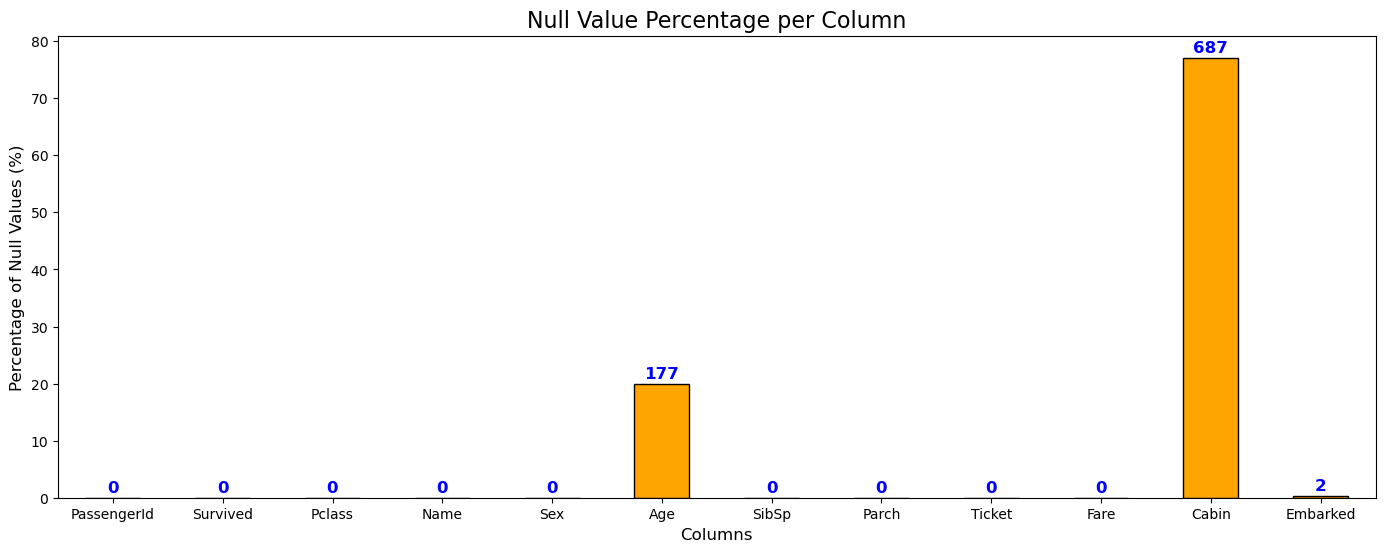

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [577]:
def nullPercentage(data):
     nullPercnt = (data.isna().sum() / len(data) * 100).round(2)
     null_counts = data.isna().sum()

     plt.figure(figsize=(17, 6))
     ax = nullPercnt.plot(kind='bar', color='orange', edgecolor='black')
     plt.title('Null Value Percentage per Column', fontsize=16)
     plt.xlabel('Columns', fontsize=12)
     plt.ylabel('Percentage of Null Values (%)', fontsize=12)
     plt.xticks(rotation=0)
     # Add the count of null values above each bar with customized text format
     for i in range(len(nullPercnt)):
          ax.text(i, nullPercnt[i] + 1, f'{null_counts[i]}', ha='center', fontsize=12, color='blue', fontweight='bold')
     plt.show()

     return nullPercnt
nullPercentage(data)

#### **```Null Value Handling```**

In [578]:
def nullValueHandle(data):
     dataMode = data['Age'].mode()[0]
     data['Age'] = data['Age'].fillna(dataMode)
     return data
nullValueHandle(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### **```New Column For Age Group```**

In [579]:
def age_group(data, age_column='Age'):
     # Define the age ranges (bins)
    bins = [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 100]
    # Define labels for the age ranges
    labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
    # Use pd.cut() to create a new column with age groups
    data['Age Group'] = pd.cut(data[age_column], bins=bins, labels=labels, right=False)
    return data

age_group(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,31-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,31-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,21-30
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,11-20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S,21-30
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,21-30


### ```Unique Passengers.```

In [580]:
data['Name'].nunique()

891

### ```Least and Most Expansive Fare```

In [581]:
def leastMostFare(data):
     datas = data['Fare'].sort_values(ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False)
     least = datas.head(1).values[0]
     most = datas.tail(1).values[0]
     print("Least Fare:", least, "& Most Fare:", most)

leastMostFare(data)

Least Fare: 0.0 & Most Fare: 512.3292


### ```Name of Passenger – Rich & Poor```

In [582]:
def leastMostFare(data):
    datas = data.sort_values(by='Fare', ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False)
    least_fare = datas.head(1) 
    most_fare = datas.tail(1)
    least_name = least_fare['Name'].values[0]
    most_name = most_fare['Name'].values[0]
    least_value = least_fare['Fare'].values[0]
    most_value = most_fare['Fare'].values[0]
    print(f"Least Fare: {least_value} - (Passenger: {least_name})")
    print(f"Most Fare: {most_value} - (Passenger: {most_name})")

leastMostFare(data)


Least Fare: 0.0 - (Passenger: Tornquist, Mr. William Henry)
Most Fare: 512.3292 - (Passenger: Cardeza, Mr. Thomas Drake Martinez)


### ```Count of Age Groups```

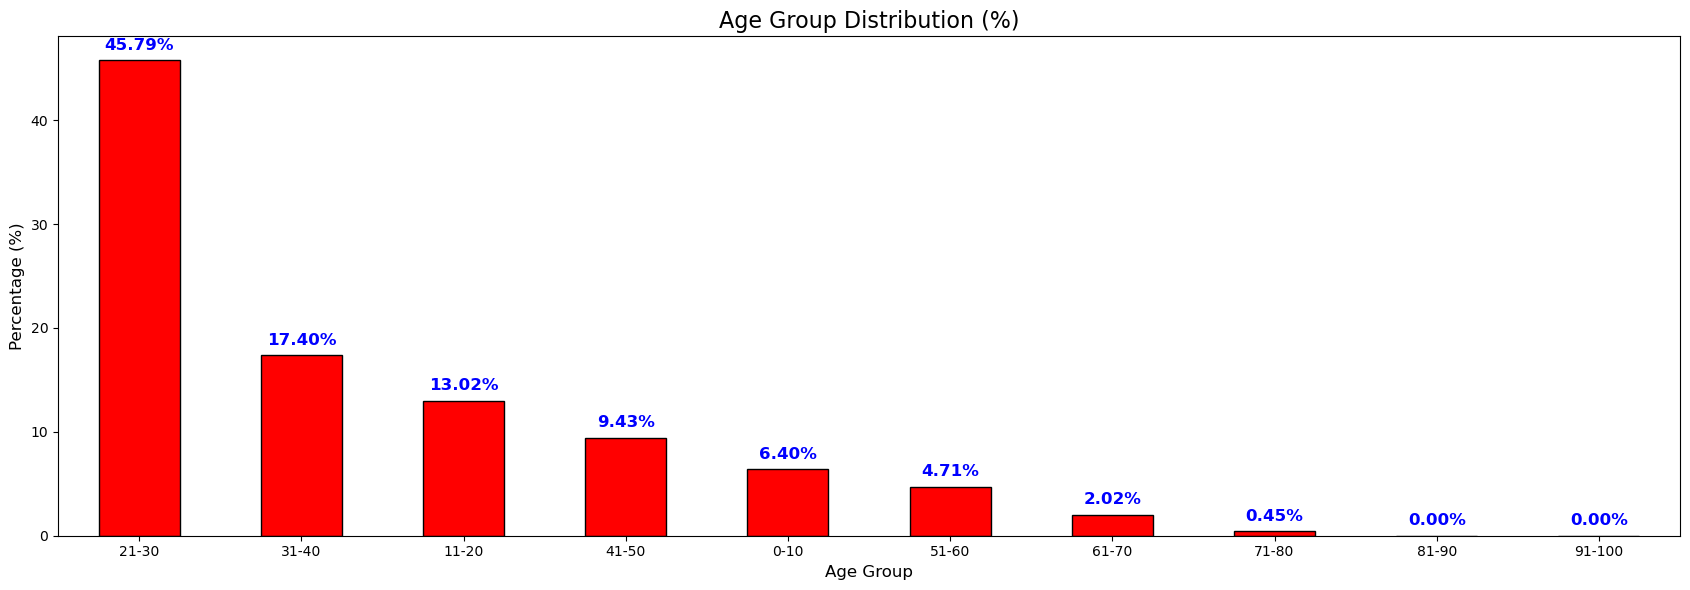

Age Group
21-30     408
31-40     155
11-20     116
41-50      84
0-10       57
51-60      42
61-70      18
71-80       4
81-90       0
91-100      0
Name: count, dtype: int64

In [583]:
def age_group_distribution(data):
    age_group_counts = data['Age Group'].value_counts()
    age_group_percentage = (age_group_counts / len(data)) * 100
    
    plt.figure(figsize=(17, 6))
    ax = age_group_percentage.plot(kind='bar', color='red', edgecolor='black')
    plt.title('Age Group Distribution (%)', fontsize=16)
    plt.xlabel('Age Group', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xticks(rotation=0)

    # Annotate the bars with the percentage values
    for i, value in enumerate(age_group_percentage):
        ax.text(i, value + 1, f'{value:.2f}%', ha='center', fontsize=12, color='blue', fontweight='bold')

    plt.tight_layout()
    plt.show()

    return age_group_counts

age_group_distribution(data)

### ```Younger & Older Age```

In [584]:
def youngerOlder(data):
     datas = data['Age'].sort_values(ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False)
     young = datas.head(1).values[0]
     old = datas.tail(1).values[0]
     print("Least Fare:", young, "& Most Fare:", old)

youngerOlder(data)

Least Fare: 0.42 & Most Fare: 80.0


### ```Percentage Distribution – Male & Female```

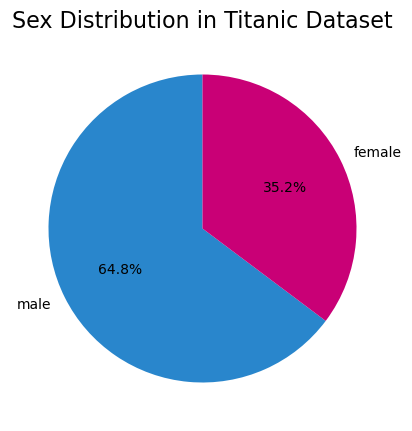

Sex
male      577
female    314
Name: count, dtype: int64

In [585]:
def sexDistribution(data):
    sex_counts = data['Sex'].value_counts()
    plt.figure(figsize=(5, 5))
    plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['#2986cc', '#c90076'])
    plt.title('Sex Distribution in Titanic Dataset', fontsize=16)
    plt.show()
    return sex_counts

sexDistribution(data)

### ```Percentage Distribution – Survived (Binary 0 & 1)```

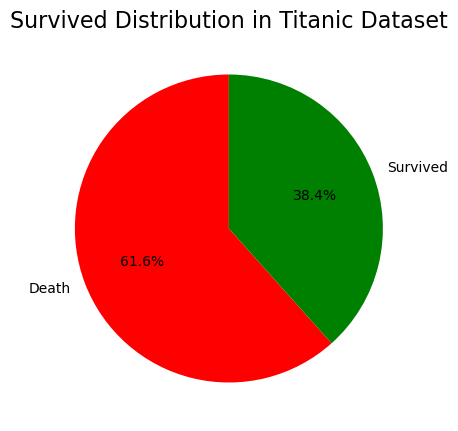

Survived
Death       549
Survived    342
Name: count, dtype: int64

In [586]:
def survived(data):
    data['Survived'] = data['Survived'].map({1: 'Survived', 0: 'Death'})
    survived_counts = data['Survived'].value_counts()
    plt.figure(figsize=(5, 5))
    plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
    plt.title('Survived Distribution in Titanic Dataset', fontsize=16)
    plt.show()
    return survived_counts

survived(data)

### ```Percentage Distribution – Passengers Class (Multi Class Data – 1,2,3)```

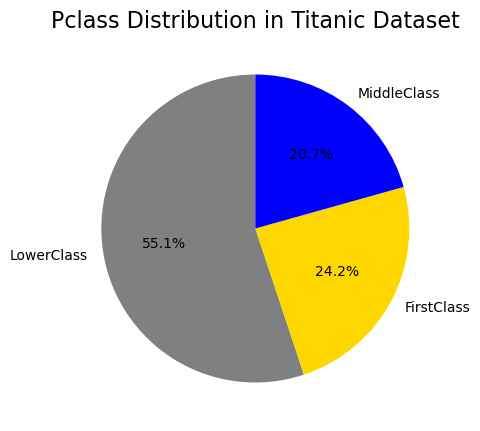

Pclass
LowerClass     491
FirstClass     216
MiddleClass    184
Name: count, dtype: int64

In [587]:
def passengerClass(data):
    data['Pclass'] = data['Pclass'].map({1: 'FirstClass', 2: 'MiddleClass', 3: 'LowerClass'})
    passengerClass_counts = data['Pclass'].value_counts()
    plt.figure(figsize=(5, 5))
    plt.pie(passengerClass_counts, labels=passengerClass_counts.index, autopct='%1.1f%%', startangle=90, colors=['grey', 'gold', 'blue'])
    plt.title('Pclass Distribution in Titanic Dataset', fontsize=16)
    plt.show()
    return passengerClass_counts

passengerClass(data)

### ```Drop Unwanted Columns```

In [588]:
def dropColumns(data):
     data = data.drop(['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age Group', 'PassengerId'], axis=1)
     return data
data = dropColumns(data)

### ```String Data to Numeric Data```

In [589]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [590]:
def catTonum(data):
     from sklearn.preprocessing import LabelEncoder
     lab = LabelEncoder()
     data['Survived'] = lab.fit_transform(data['Survived'])
     data['Pclass'] = lab.fit_transform(data['Pclass'])
     data['Sex'] = lab.fit_transform(data['Sex'])
     return data
catTonum(data)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,1,1,22.0,1,0
1,1,0,0,38.0,1,0
2,1,1,0,26.0,0,0
3,1,0,0,35.0,1,0
4,0,1,1,35.0,0,0
...,...,...,...,...,...,...
886,0,2,1,27.0,0,0
887,1,0,0,19.0,0,0
888,0,1,0,24.0,1,2
889,1,0,1,26.0,0,0


In [591]:
data.to_csv('TitanicEDA.csv')